In [1]:
import pandas as pd 
import numpy as np 
import datetime as dt 
import matplotlib.pyplot as plt 

import sys 
sys.path.append('/Users/jerald/Documents/Dir/Python/stocker')
from bin.main import Manager

m = Manager('../../../')

Options db Connected: 2024-08-24 21:24:58.885256
Prices Connected: 2024-08-24 21:24:58.886132


In [22]:
def get_unique_expirations(stock):
    q = f'''
    select distinct date(expiry) as expiry from {stock} order by date(expiry) asc 
    '''
    return q


exps = m.Optionsdb.option_custom_q(get_unique_expirations('tsla'), 'option_db')

exps.expiry = pd.to_datetime(exps.expiry)
exps['code'] = exps.expiry.apply(lambda x: x.strftime('%y%m%d'))
expirations = sorted(exps.expiry.to_list())
exps

,expiry,code
0,2024-04-12,240412
1,2024-04-19,240419
2,2024-04-26,240426
3,2024-05-03,240503
4,2024-05-10,240510
5,2024-05-17,240517
6,2024-05-24,240524
7,2024-05-31,240531
8,2024-06-07,240607
9,2024-06-14,240614


In [27]:
def get_expiration_data(stock, expiration):
    q = f'''
    select * from {stock} where contractsymbol like "%{expiration}%"
    '''
    return q

# options data 
code = exps[exps.expiry == expirations[23]].code.iloc[0]
expdf = m.Optionsdb.option_custom_q(get_expiration_data('tsla', code), 'change_db')
expdf['moneyness'] = expdf.strike / expdf.stk_price
expdf.gatherdate = pd.to_datetime(expdf.gatherdate)

dtes = (expdf.gatherdate.min().date().strftime('%Y-%m-%d'), expdf.gatherdate.max().date().strftime('%Y-%m-%d'))

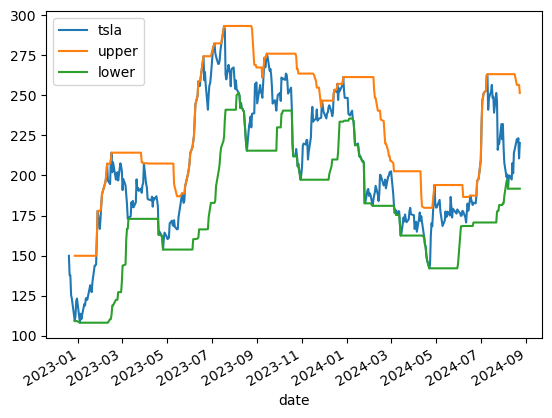

In [28]:
close_prices = m.Pricedb.get_close(['tsla'])[dtes[0]:dtes[1]]
close_prices['upper'] = close_prices['tsla'].rolling(window = 28, min_periods = 6).max()
close_prices['lower'] = close_prices['tsla'].rolling(window = 28, min_periods = 6).min()
close_prices.plot()
plt.show()

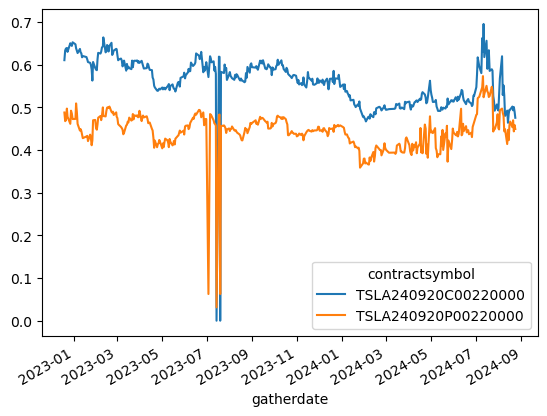

In [31]:
expdf[expdf.strike == 220].groupby(['contractsymbol', 'gatherdate']).impliedvolatility.last().unstack(level=0).plot()
plt.show()

<Axes: xlabel='gatherdate'>

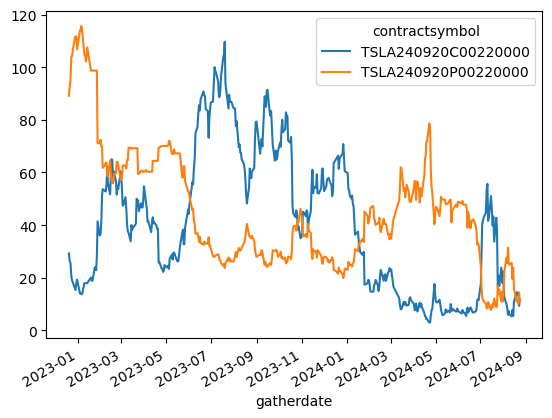

In [32]:
expdf[expdf.strike == 220].groupby(['contractsymbol', 'gatherdate']).lastprice.last().unstack(level=0).plot()